<a href="https://colab.research.google.com/github/SedefAlkan/Data-cleaning-and-preprocessing-with-Python/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import warnings
warnings.filterwarnings("ignore")



#Veri OKUMA

In [4]:
veri = pd.read_csv('athlete_events.csv')
veri.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


#VERİ TEMİZLEME

In [7]:
veri.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
veri.rename(columns={'ID'    :    'id',
                     'Name'  :    'isim',
                     'Sex'   :    'Cinsiyet',
                     'Age'   :    'Yaş',
                     'Height':    'Boy',
                     'Weight':    'Kilo',
                     'Team'  :    'Takım',
                     'NOC'   :    'uok',
                     'Games' :    'Oyunlar',
                     'Year':      'Yıl',
                     'Season'  :  'Sezon',
                     'City'   :   'Şehir',
                     'Sport' :    'Spor',
                     'Event'  :   'Etkinlik',
                     'Medal'   :  'Madalya'},inplace =True)

In [9]:
veri.head(3)

,id,isim,Cinsiyet,Yaş,Boy,Kilo,Takım,uok,Oyunlar,Yıl,Sezon,Şehir,Spor,Etkinlik,Madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


Bazı satırları çıkartma

In [10]:
veri=veri.drop(["id","uok"],axis=1)
veri.head()

,isim,Cinsiyet,Yaş,Boy,Kilo,Takım,Oyunlar,Yıl,Sezon,Şehir,Spor,Etkinlik,Madalya
0,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


 KAYIP VERİ DOLDURMA

In [11]:
essiz_etkinlik=pd.unique(veri.Etkinlik)
print("Eşsiz etkinlik sayısı:{}".format(len(essiz_etkinlik))) #toplam farklı etkinlik sayısı
essiz_etkinlik[:10]  #ilk 10 tanesini görme

Eşsiz etkinlik sayısı:765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [12]:
veri_gecici= veri.copy() #gerçek vriyi bozmamak için kopyasını oluşturma
boy_kilo_liste= ["Boy","Kilo"]
for e in essiz_etkinlik: #liste içerisinde dolaş
    etkinlik_filtre=veri_gecici.Etkinlik== e
    veri_filtreli=veri_gecici[etkinlik_filtre]
    for s in boy_kilo_liste:
        ortalama=np.round(np.mean(veri_filtreli[s]),2)
        if not np.isnan(ortalama):
            veri_filtreli[s]=veri_filtreli[s].fillna(ortalama)
        else:
          tum_veri_ortalaması=np.round(np.mean(veri[s]),2)
          veri_filtreli[s]=veri_filtreli[s].fillna(tum_veri_ortalaması)
    veri_gecici[etkinlik_filtre]=veri_filtreli
veri=veri_gecici.copy()
veri.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   Cinsiyet  271116 non-null  object 
 2   Yaş       261642 non-null  float64
 3   Boy       271116 non-null  float64
 4   Kilo      271116 non-null  float64
 5   Takım     271116 non-null  object 
 6   Oyunlar   271116 non-null  object 
 7   Yıl       271116 non-null  int64  
 8   Sezon     271116 non-null  object 
 9   Şehir     271116 non-null  object 
 10  Spor      271116 non-null  object 
 11  Etkinlik  271116 non-null  object 
 12  Madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
#yas sütünundaki kayıp veriyi veri setinin yaş ortalamasına göre doldurma
yas_ortalama=np.round(np.mean(veri.Yaş),2)
if not np.isnan(yas_ortalama):
  veri.Yaş=veri.Yaş.fillna(yas_ortalama)
else:
  veri.Yaş=veri.Yaş.fillna(0)
veri.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   Cinsiyet  271116 non-null  object 
 2   Yaş       271116 non-null  float64
 3   Boy       271116 non-null  float64
 4   Kilo      271116 non-null  float64
 5   Takım     271116 non-null  object 
 6   Oyunlar   271116 non-null  object 
 7   Yıl       271116 non-null  int64  
 8   Sezon     271116 non-null  object 
 9   Şehir     271116 non-null  object 
 10  Spor      271116 non-null  object 
 11  Etkinlik  271116 non-null  object 
 12  Madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [ ]:
pd.isnull(veri.Madalya).sum()

np.int64(231333)

In [ ]:
#madalya alamayan sporcuları çıkart
madalya_degiskeni_filtresi= ~pd.isnull(veri.Madalya)
veri=veri[madalya_degiskeni_filtresi]


veri.head(10)


,isim,Cinsiyet,Yaş,Boy,Kilo,Takım,Oyunlar,Yıl,Sezon,Şehir,Spor,Etkinlik,Madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
50,Paavo Johannes Aaltonen,M,32.0,175.00,64.00,Finland,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze
60,Kjetil Andr Aamodt,M,20.0,176.00,85.00,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold


In [ ]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   Cinsiyet  39783 non-null  object 
 2   Yaş       39783 non-null  float64
 3   Boy       39783 non-null  float64
 4   Kilo      39783 non-null  float64
 5   Takım     39783 non-null  object 
 6   Oyunlar   39783 non-null  object 
 7   Yıl       39783 non-null  int64  
 8   Sezon     39783 non-null  object 
 9   Şehir     39783 non-null  object 
 10  Spor      39783 non-null  object 
 11  Etkinlik  39783 non-null  object 
 12  Madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [ ]:
#temizlenmiş verileri kaydetme
veri.to_csv("olimpiyatlar_temizlenmis.csv",index=False)

#VERİ GÖRSELLEŞTİRME



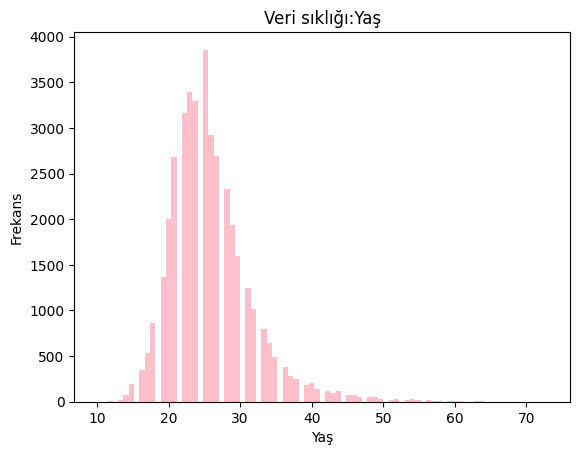

In [ ]:
#sayısal verilerin grafiklerini çizdirelim
#HİSTOGRAM
def plotHistoram(degisken):

    plt.figure()
    plt.hist(veri[degisken], bins=85,color="pink")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title("Veri sıklığı:{}".format(degisken))
    plt.show()

plotHistoram("Yaş")



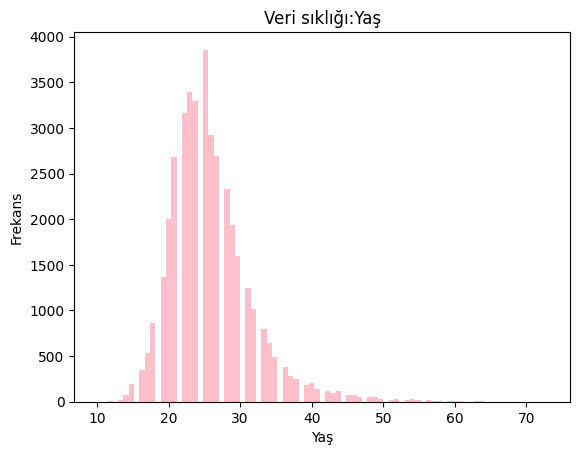

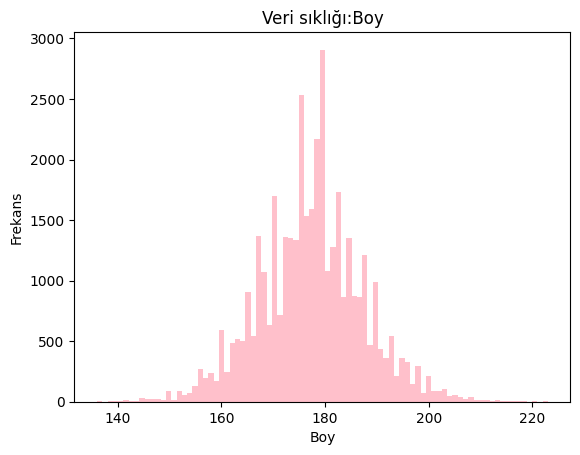

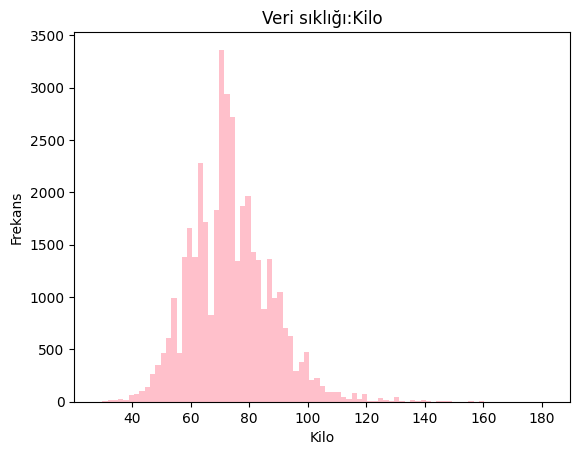

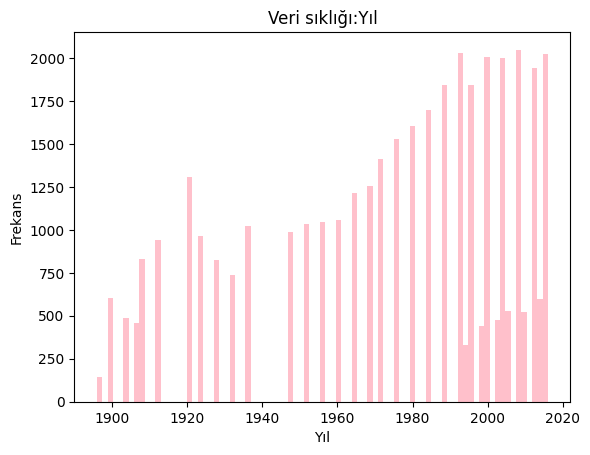

In [ ]:
#tüm sayısal değişkenler için grafik çizdirme
sayisal_degisken=["Yaş","Boy","Kilo","Yıl"]
for i in sayisal_degisken:
  plotHistoram(i)



In [ ]:
#veriyi tanımlama fonksiyonu
veri.describe()

,Yaş,Boy,Kilo,Yıl
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


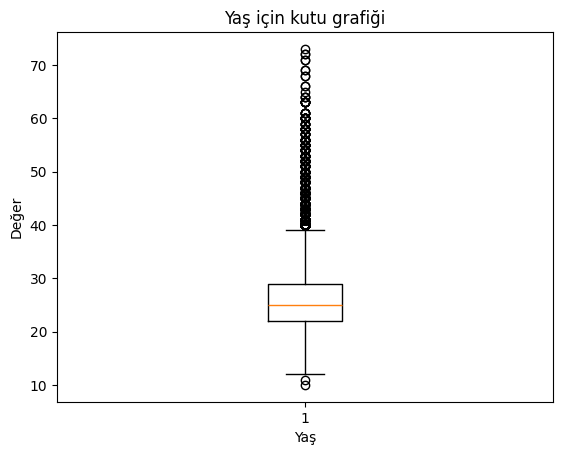

In [ ]:
#KUTU GRAFİĞİ
plt.boxplot(veri.Yaş)
plt.title("Yaş için kutu grafiği")
plt.xlabel("Yaş")
plt.ylabel("Değer")
plt.show()

